In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal
# import koreanize_matplotlib
import seaborn as sns

gdp_total = pd.read_csv("../data/GDP_data/totalGDP_rate.csv",index_col = 0)
gdp_1 = pd.read_csv("../data/GDP_data/ind1st_rate.csv",index_col = 0)
gdp_2 = pd.read_csv("../data/GDP_data/ind2nd_rate.csv",index_col = 0)
gdp_3 = pd.read_csv("../data/GDP_data/ind3rd_rate.csv",index_col = 0)

pop = pd.read_csv("../data/GDP_data/population_rate.csv",index_col = 0)

df0 = pd.read_csv("../data/GDP_data/totalGDP_pop_coef.csv").set_index(['city', 'year'])
df1 = pd.read_csv("../data/GDP_data/ind1st_pop_coef.csv").set_index(['city', 'year'])
df2 = pd.read_csv("../data/GDP_data/ind2nd_pop_coef.csv").set_index(['city', 'year'])
df3 = pd.read_csv("../data/GDP_data/ind3rd_pop_coef.csv").set_index(['city', 'year'])
df_overall = pd.read_csv("../data/GDP_data/overall_ind_table.csv").set_index(['city', 'year'])



In [20]:
total_corrby_year = pd.DataFrame(gdp_total.corrwith(pop))
ind1_corrby_year = pd.DataFrame(gdp_1.corrwith(pop))
ind2_corrby_year = pd.DataFrame(gdp_2.corrwith(pop))
ind3_corrby_year = pd.DataFrame(gdp_3.corrwith(pop))
result_year = pd.concat([total_corrby_year, ind1_corrby_year, ind2_corrby_year, ind3_corrby_year]
                   , axis =1).reindex(total_corrby_year.index)
result_year.columns = ['총생산', '1차산업', '2차산업', '3차산업']

total_corrby_city = pd.DataFrame(gdp_total.transpose().corrwith(pop.transpose()))
ind1_corrby_city = pd.DataFrame(gdp_1.transpose().corrwith(pop.transpose()))
ind2_corrby_city = pd.DataFrame(gdp_2.transpose().corrwith(pop.transpose()))
ind3_corrby_city = pd.DataFrame(gdp_3.transpose().corrwith(pop.transpose()))
result_city = pd.concat([total_corrby_city, ind1_corrby_city, ind2_corrby_city, ind3_corrby_city]
                   , axis =1).reindex(total_corrby_city.index)
result_city.columns = ['총생산', '1차산업', '2차산업', '3차산업']

# !기하적인 변화 양상을 보이는 gdp와 인구 데이터를 산술적으로 비교하기 위해 전년도 대비 증가 비율을 차용

In [21]:
# 년도별 인구 증감율 / 산업별 성장율 상관관계
result_year_avg = pd.DataFrame(result_year)
result_year_avg.loc['평균'] = result_year.mean()
result_year_avg

,총생산,1차산업,2차산업,3차산업
2009,0.428298,0.129043,0.490299,0.491208
2010,0.348710,-0.186707,0.027432,0.674876
2011,0.436182,-0.190780,0.454433,0.429786
2012,0.511082,-0.231295,0.027103,0.678240
2013,0.111123,0.360656,0.219678,0.590306
2014,0.938519,0.438705,0.185877,0.995076
2015,0.469917,-0.309007,-0.196142,0.960704
2016,0.407361,0.562388,0.113279,0.676596
2017,0.305316,0.804123,-0.043960,0.860736
2018,0.142459,-0.454470,0.000155,0.870990


In [22]:
# 년도별 인구 증감율 / 산업별 성장율 상관관계에서의 표준편차의 표준화 (산업별-총생산 간 표준편차 상대값)
result_year_std = pd.DataFrame(result_year)
result_year_std.loc['표준편차'] = result_year_std.std()
result_year_std.loc['표준편차 상대값'] = result_year_std.loc['표준편차'
                                                      ]/result_year_std.loc['표준편차','총생산']
result_year_std.loc['평균'] = result_year_std.iloc[:-2].mean()
# result_year_std.to_csv("~/Downloads/gdp1.csv")

In [23]:
# 년도별 인구 증감율 / 산업별 성장율 상관관계 표준화(전체 기간 평균과의 차이)
normalized_year_avg = result_year_avg.iloc[:-2] - result_year_avg.loc['평균'].values.squeeze()
normalized_year_avg

,총생산,1차산업,2차산업,3차산업
2009,-0.024149,0.130915,0.265288,-0.235998
2010,-0.103737,-0.184836,-0.197579,-0.052330
2011,-0.016265,-0.188908,0.229422,-0.297419
2012,0.058635,-0.229424,-0.197908,-0.048966
2013,-0.341324,0.362528,-0.005333,-0.136900
2014,0.486072,0.440577,-0.039134,0.267870
2015,0.017470,-0.307136,-0.421153,0.233498
2016,-0.045086,0.564259,-0.111732,-0.050609
2017,-0.147131,0.805994,-0.268971,0.133530
2018,-0.309988,-0.452599,-0.224856,0.143784


In [24]:
# 시도별 인구 증감율 / 산업별 성장율 상관관계
result_city

,총생산,1차산업,2차산업,3차산업
전국,0.528359,-0.225903,0.610192,0.234593
서울특별시,-0.058901,-0.304825,0.297240,-0.017445
부산광역시,0.414890,-0.185175,0.607019,0.130697
대구광역시,0.294750,0.056011,0.464592,0.288786
인천광역시,0.492032,-0.347382,0.326940,0.503739
광주광역시,0.404697,-0.129896,0.475002,0.274538
대전광역시,0.379070,-0.476128,0.442333,0.373099
울산광역시,0.444794,-0.093491,0.169286,0.719734
세종특별자치시,0.524178,0.174637,-0.531474,0.738862
경기도,0.539062,-0.299647,0.722061,0.198855


In [25]:
# 시도별 인구 증감율 / 산업별 성장율 상관관계에서의 표준편차의 표준화 (산업별-총생산 간 표준편차 상대값)
result_city_std = pd.DataFrame(result_city)
result_city_std.loc['표준편차'] = result_city_std.iloc[1:].std()
result_city_std.loc['표준편차 상대값'] = result_city_std.loc['표준편차'
                                                      ]/result_city_std.loc['표준편차','총생산']
# result_city_std.to_csv("~/Downloads/gdp2.csv")

In [26]:
result_city.loc[['전국', '서울특별시', '경기도']]

,총생산,1차산업,2차산업,3차산업
전국,0.528359,-0.225903,0.610192,0.234593
서울특별시,-0.058901,-0.304825,0.297240,-0.017445
경기도,0.539062,-0.299647,0.722061,0.198855


In [27]:
# 시도별 인구 증감율 / 산업별 성장율 상관관계 표준화(전국 평균과의 차이)
normalized_city = result_city.iloc[1:-1] - result_city.loc['전국'].values.squeeze()
normalized_city

,총생산,1차산업,2차산업,3차산업
서울특별시,-0.587260,-0.078922,-0.312952,-0.252038
부산광역시,-0.113469,0.040729,-0.003173,-0.103896
대구광역시,-0.233608,0.281915,-0.145600,0.054193
인천광역시,-0.036327,-0.121479,-0.283252,0.269146
광주광역시,-0.123662,0.096007,-0.135190,0.039945
대전광역시,-0.149289,-0.250225,-0.167859,0.138506
울산광역시,-0.083564,0.132413,-0.440906,0.485141
세종특별자치시,-0.004181,0.400541,-1.141666,0.504269
경기도,0.010703,-0.073743,0.111869,-0.035738
강원도,-0.446294,0.246489,-0.106793,-0.255574


In [28]:
normalized_city.loc[["서울특별시", "경기도"]]

,총생산,1차산업,2차산업,3차산업
서울특별시,-0.587260,-0.078922,-0.312952,-0.252038
경기도,0.010703,-0.073743,0.111869,-0.035738


In [29]:
cov_seoul = df_overall.loc[('서울특별시')]*100
# cov_seoul = cov_seoul.cov()
cov_ggi = df_overall.loc[('경기도')]*100
# cov_ggi = cov_ggi.cov()
cov_seoul

,population_growth,total_gdp_growth,primary_industry_growth,secondary_industry_growth,tertiary_industry_growth
year,,,,,
2009,0.073278,1.496269,-12.183612,-2.894680,2.150365
2010,1.021159,3.534354,-5.886436,9.440076,3.804006
2011,-0.609607,3.152899,-5.301640,1.157967,3.128900
2012,-0.530368,1.399856,15.729766,11.577345,1.525827
2013,-0.506831,1.649846,-13.562058,-5.092358,2.289462
2014,-0.398397,1.507824,-3.891876,1.403719,1.305681
2015,-0.802238,2.921108,-23.443875,-2.200098,3.046244
2016,-0.913623,2.839632,-0.462906,-3.622446,3.013657
2017,-0.737014,2.339333,1.606007,-4.318353,2.330059


/home/kim/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  fig.canvas.prin

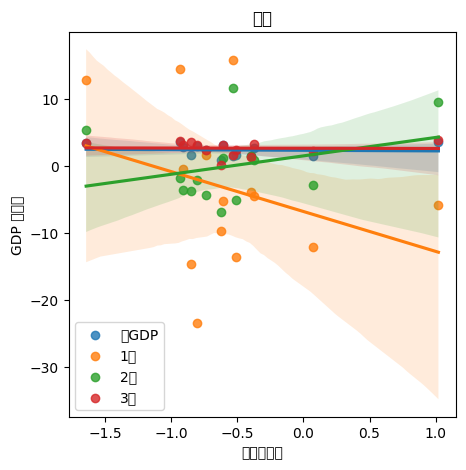

In [30]:
plt.figure(figsize=(5,5))
x1 = cov_seoul['population_growth']
y1 = cov_seoul['total_gdp_growth']
y2 = cov_seoul['primary_industry_growth']
y3 = cov_seoul['secondary_industry_growth']
y4 = cov_seoul['tertiary_industry_growth']

sns.regplot(x=x1, y = y1, scatter= True, label = '총GDP')
sns.regplot(x=x1, y = y2, scatter= True, label = '1차')
sns.regplot(x=x1, y = y3, scatter= True, label = '2차')
sns.regplot(x=x1, y = y4, scatter= True, label = '3차')


plt.legend()
plt.xlabel("인구증가율")
plt.ylabel("GDP 증가율")
plt.title("서울")

plt.show()

/tmp/ipykernel_24032/2795549421.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/home/kim/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


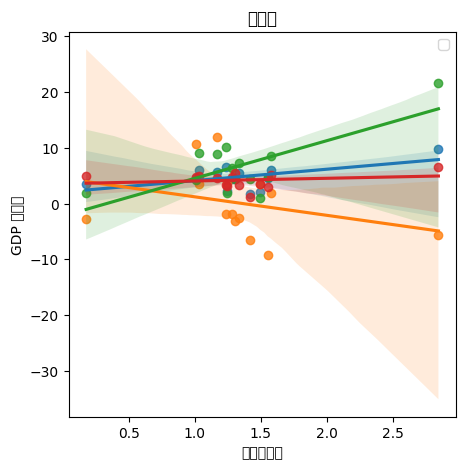

In [31]:
plt.figure(figsize=(5,5))

x1 = cov_ggi['population_growth']
y1 = cov_ggi['total_gdp_growth']
y2 = cov_ggi['primary_industry_growth']
y3 = cov_ggi['secondary_industry_growth']
y4 = cov_ggi['tertiary_industry_growth']

sns.regplot(x=x1, y = y1, scatter= True)
sns.regplot(x=x1, y = y2, scatter= True)
sns.regplot(x=x1, y = y3, scatter= True)
sns.regplot(x=x1, y = y4, scatter= True)


plt.legend()
plt.xlabel("인구증가율")
plt.ylabel("GDP 증가율")
plt.title("경기도")

plt.show()